### clone repo

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 15368, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15368 (delta 2), reused 9 (delta 1), pack-reused 15355
Receiving objects: 100% (15368/15368), 14.36 MiB | 5.94 MiB/s, done.
Resolving deltas: 100% (10502/10502), done.
/home/lolitav/projects_v3/objects_detection/yolov5


In [1]:
%cd yolov5
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-134-g23c4923 Python-3.10.9 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)


Setup complete ✅ (16 CPUs, 7.5 GB RAM, 165.2/251.0 GB disk)


### setup trainig and monitoring

In [2]:
logger = 'Comet'

if logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

Note: you may need to restart the kernel to use updated packages.


COMET INFO: Comet API key is valid


In [3]:
!python train.py --img 320 --batch-size 3 --epochs 10 --data "../uno.yaml" --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=../uno.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=3, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.10.9 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015

### inference

YOLOv5 🚀 v7.0-134-g23c4923 Python-3.10.9 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


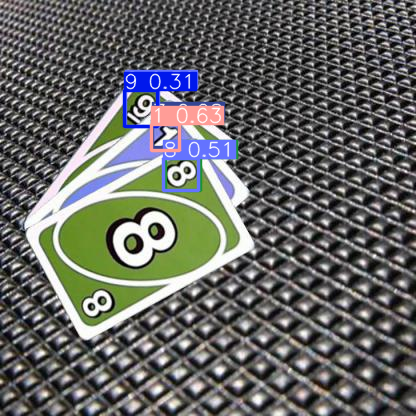

In [4]:
# path can be different, depends on which experiment number is this
model = torch.hub.load('.', 'custom', path='runs/train/exp3/weights/best.pt', source='local',force_reload=True, verbose=True) 
img = '../datasets/test/images/006431818_jpg.rf.1d81de238d72a3119fe5299a12a25dcc.jpg'
results = model(img)
results.show()